Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [120]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

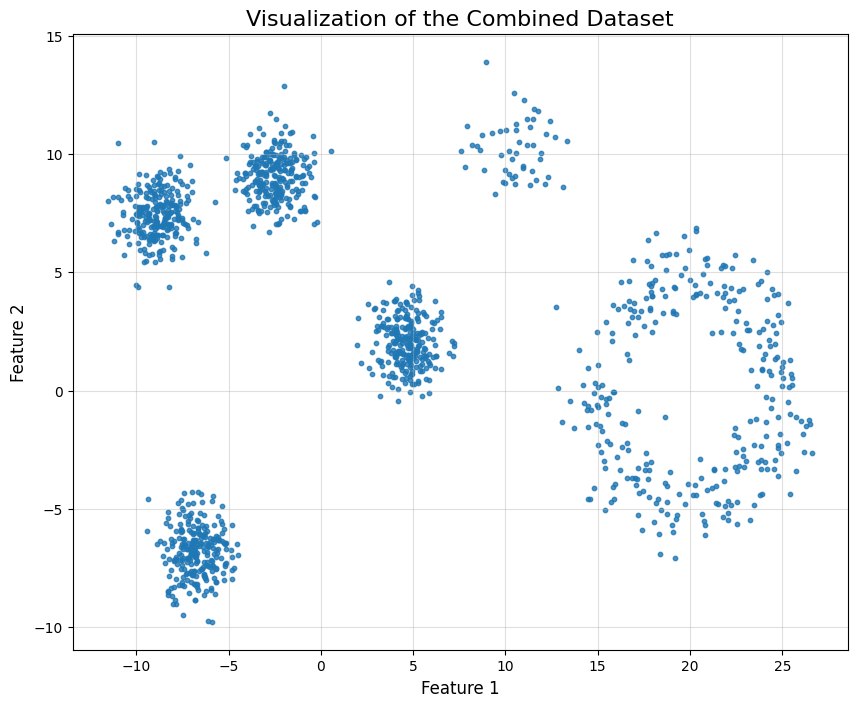

In [121]:

X = create_data(1.0, 1000, 50, 300, 200)
# Data visuazliation is here:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Visualization of the Combined Dataset", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [122]:
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to find the optimal number of clusters using the Silhouette Method
def find_optimal_clusters(X, max_clusters=10):
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42,init = "random")
        kmeans.fit(X)
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    # Return the optimal number of clusters
    optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
    return optimal_clusters,max(silhouette_scores)

# Find the optimal number of clusters
optimal_clusters, kmeans_score = find_optimal_clusters(X)

print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_clusters} and his score {kmeans_score}")

# Train KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)




Optimal number of clusters based on Silhouette Score: 6 and his score 0.7251181630059241


KMeans(n_clusters=6, random_state=42)

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [123]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Function to find the optimal number of clusters using the Silhouette Method
def find_optimal_clusters_agglomerative(X, max_clusters=10):
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)

    for n_clusters in cluster_range:
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,compute_distances=True)
        agg_clustering.fit(X)
        labels = agg_clustering.labels_
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

    # Return the optimal number of clusters
    optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
    return optimal_clusters,max(silhouette_scores)


# Find the optimal number of clusters
optimal_clusters_agg,agg_score = find_optimal_clusters_agglomerative(X)

print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_clusters_agg} and his score {agg_score}")

# Train Agglomerative Clustering with the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_agg,compute_distances=True)
agg_clustering.fit(X)




Optimal number of clusters based on Silhouette Score: 6 and his score 0.7256900714288006


AgglomerativeClustering(compute_distances=True, n_clusters=6)

5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [124]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Train DBSCAN with the best parameters
dbscan = DBSCAN(eps=1.0,algorithm="kd_tree")
dbscan.fit(X)
print(dbscan)
lables = dbscan.labels_
dbscan_score = silhouette_score(X,lables)
print(f"the  score :{dbscan_score}")

DBSCAN(algorithm='kd_tree', eps=1.0)
the  score :0.7070123298589694


6. Compare the results and choose the best method for the data


In [130]:
if(agg_score >= dbscan_score and agg_score >= kmeans_score):
  print(f"the winner is Agglomerative Clustering")
elif(agg_score <= dbscan_score and dbscan_score >= kmeans_score):
  print(f"the winner is Dbscan")
else:
  print(f"the winner is Kmeans")

the winner is Agglomerative Clustering
